In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import glob
import pandas as pd

path_list=glob.glob("frames_video4/*")
path1=path_list[0]
cam = cv.VideoCapture('videos/20250528_173920.mp4')
fps = cam.get(cv.CAP_PROP_FPS)
cam.release()
# fps
dt=1/fps
t=np.array([dt*x for x in range(len(path_list))])
# path_list
plt.style.use('ggplot')


In [2]:

df=pd.read_csv('peltier_cosas/peltiermod4.csv')
df.columns= ['t','temp']
df['t'] = pd.to_datetime(df['t'], format='%H:%M:%S').dt.time
df['t'] = df['t'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
df['t']= df['t'] - df['t'].iloc[0]
df=df[:len(t)]

In [41]:
df['t']

0        0
1        1
2        2
3        3
4        4
      ... 
328    328
329    329
330    330
331    331
332    332
Name: t, Length: 333, dtype: int64

In [17]:
img1 = cv.imread(path1)
img1 = img1[314:1924, 1459:3228]
r,g,b=np.zeros(shape=(3,t.shape[0]))

size=np.size(img1)

for j,i in enumerate(path_list):
    img = cv.imread(i)
    img = 255-img
    slice1=img[431:465,1306:3125]
    slice2=img[711:773,1351:3117]
    slice3=img[1042:1066,1297:3083]


    r_in = np.sum(slice1[:,:,0])/np.size(slice1)
    r_in += np.sum(slice2[:,:,0])/np.size(slice2)
    r_in += np.sum(slice3[:,:,0])/np.size(slice3)
    
    r[j] = r_in


    g_in = np.sum(slice1[:,:,1])/np.size(slice1)
    g_in += np.sum(slice2[:,:,1])/np.size(slice2)
    g_in += np.sum(slice3[:,:,1])/np.size(slice3)

    g[j] = g_in


    b_in = np.sum(slice1[:,:,2])/np.size(slice1)
    b_in += np.sum(slice2[:,:,2])/np.size(slice2)
    b_in += np.sum(slice3[:,:,2])/np.size(slice3)
    
    b[j] = b_in




df_video4=pd.DataFrame({'t':t,'r':r,'g':g,'b':b})
df_video4.to_csv('procesados/video4_rgb_sliced.csv',index=False)


In [3]:
df_video4=pd.read_csv('procesados/video4_rgb_sliced.csv')



In [4]:
intensidad=(df_video4['r']**2+df_video4['g']**2+df_video4['b']**2)**.5

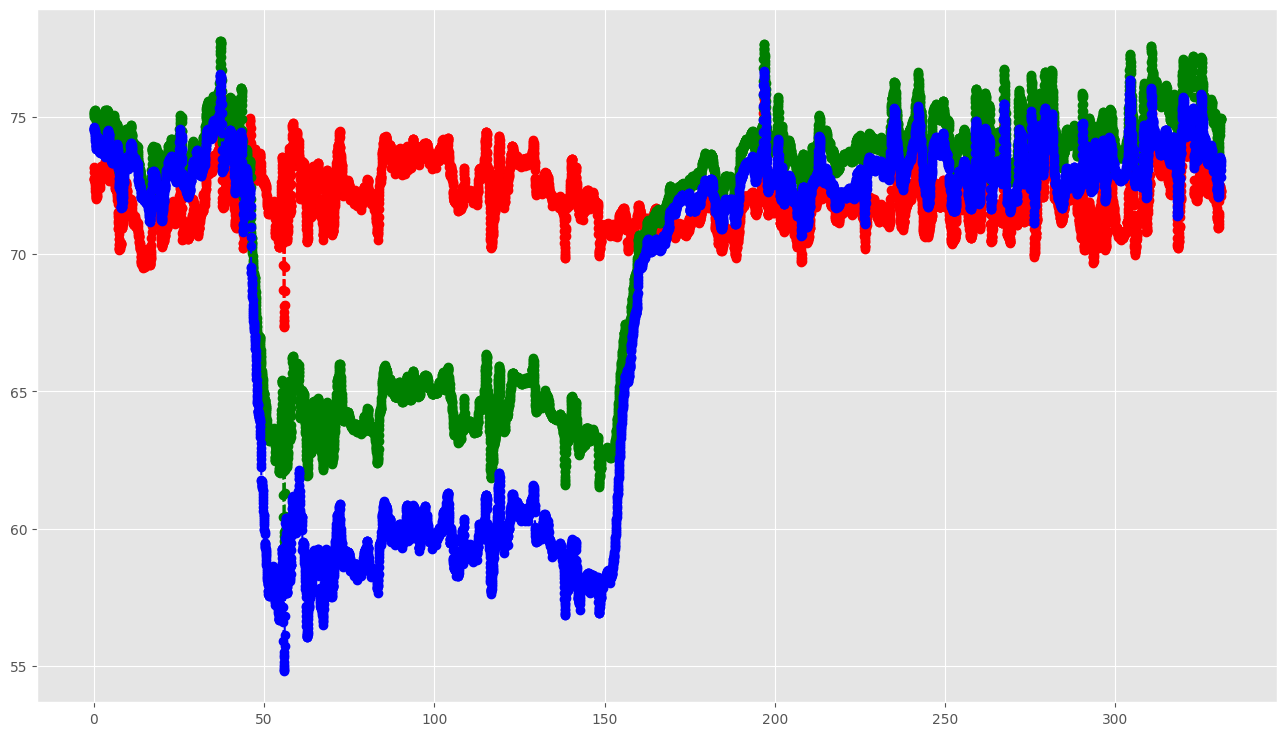

In [5]:
cut=len(df_video4['r'])
salto=1
dashdash='--'


plt.figure(figsize=(16,9))

plt.plot(t,df_video4['r'][:cut:salto],'ro'+dashdash)
plt.plot(t,df_video4['g'][:cut:salto],'go'+dashdash)
plt.plot(t,df_video4['b'][:cut:salto],'bo'+dashdash)

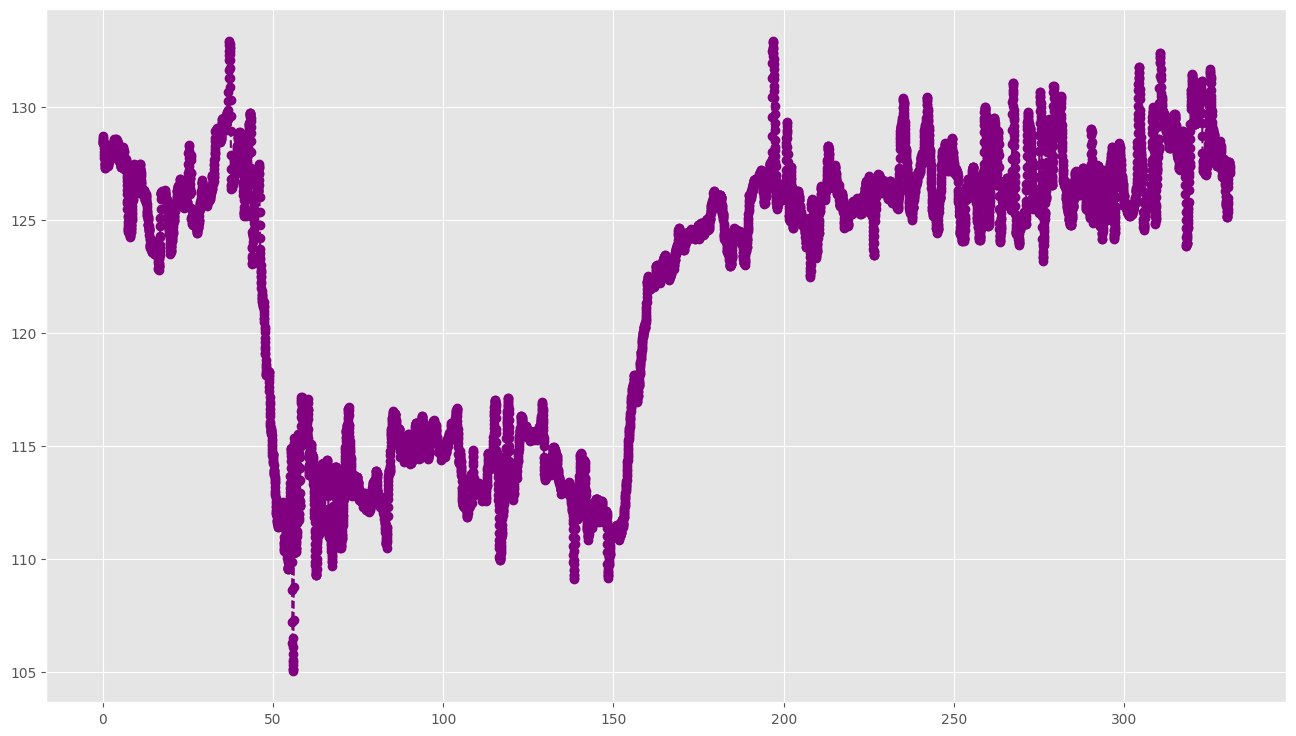

In [20]:
plt.figure(figsize=(16,9))

plt.plot(t,intensidad,'o--',color='purple')

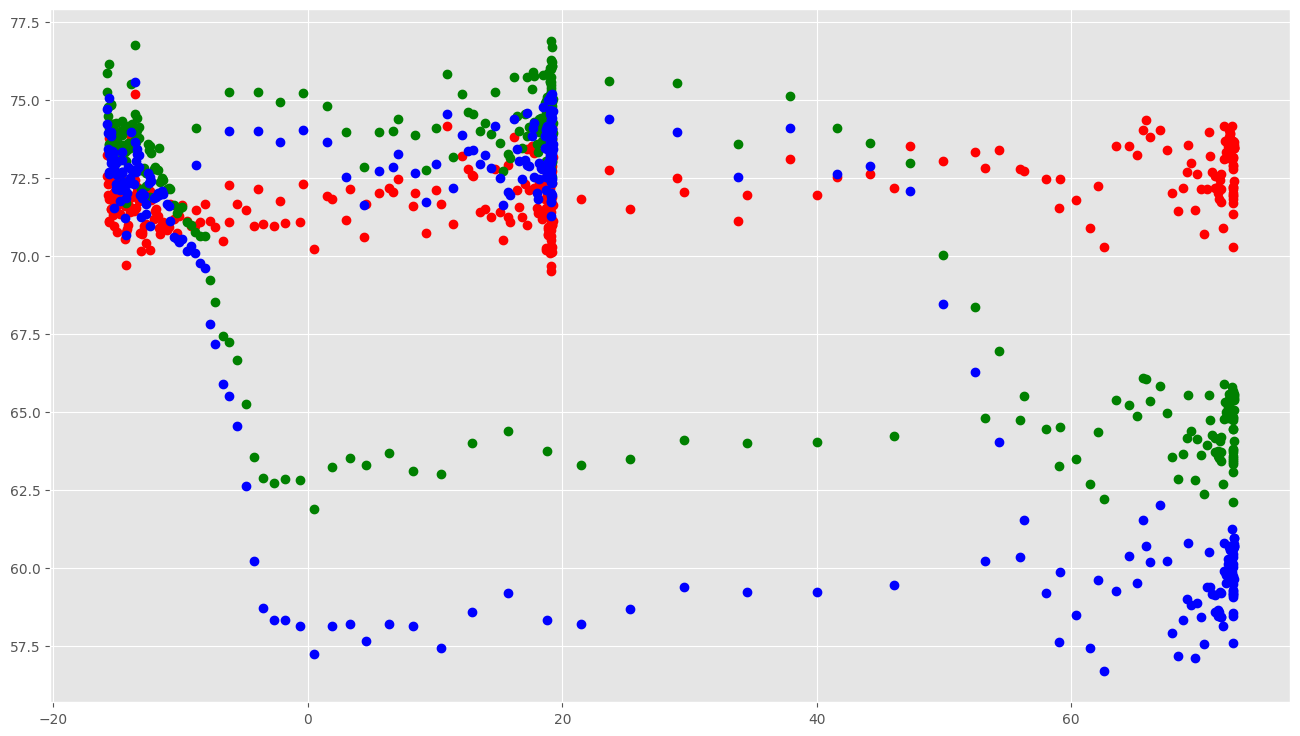

In [43]:
cut=len(df['temp'])
salto=29
dashdash=''


plt.figure(figsize=(16,9))

plt.plot(df['temp'],df_video4['r'][::salto][:cut],'ro'+dashdash)
plt.plot(df['temp'],df_video4['g'][::salto][:cut],'go'+dashdash)
plt.plot(df['temp'],df_video4['b'][::salto][:cut],'bo'+dashdash)

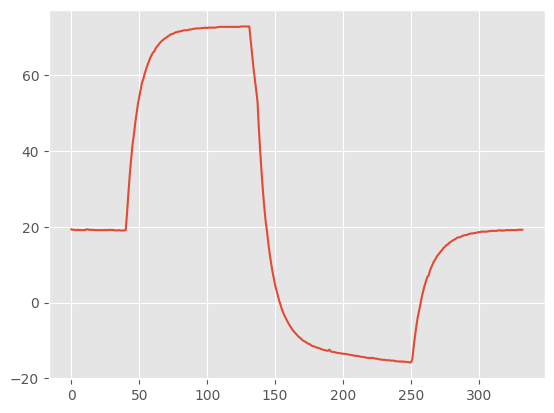

In [42]:
plt.plot(df['t'],df['temp'])

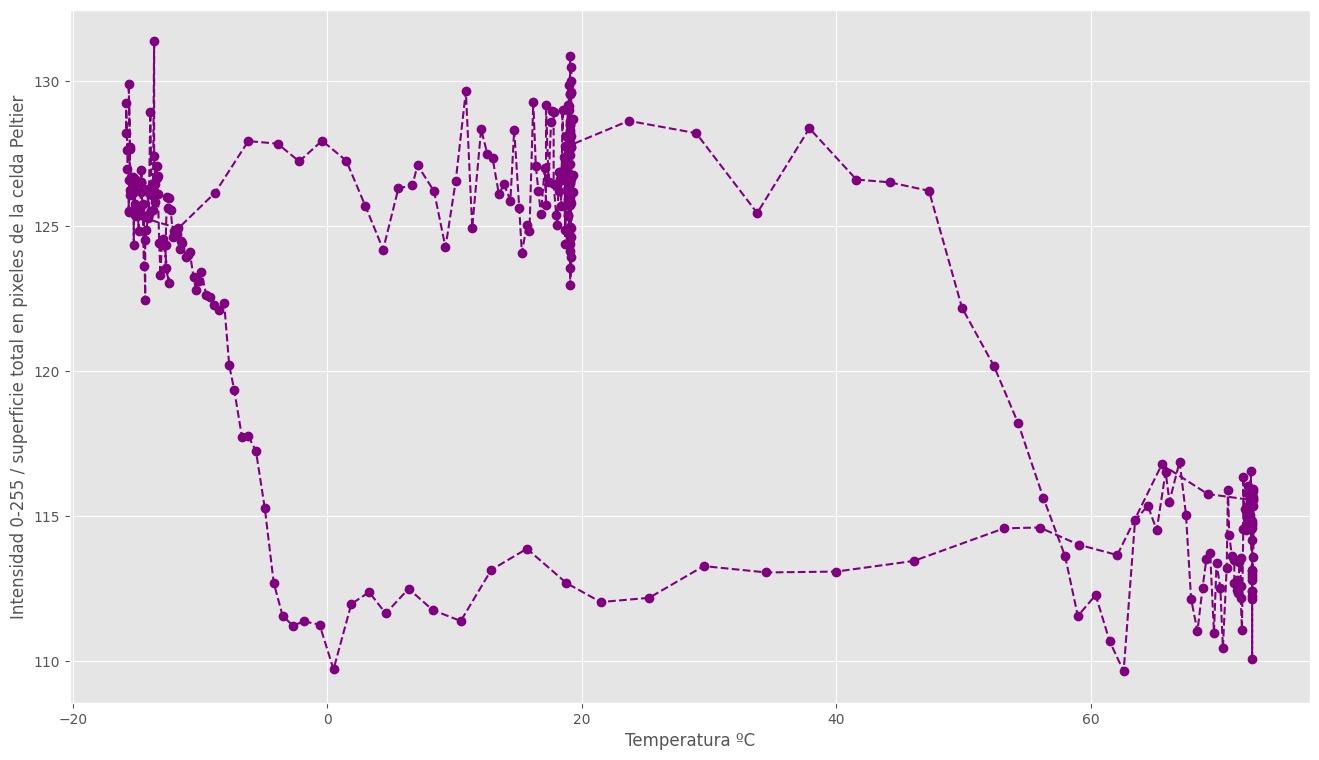

In [ ]:
plt.figure(figsize=(12,9))
salto=29
cut=333
plt.xlabel('Temperatura ºC')
plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')

color=''
dashdash='--'
plt.plot(df['temp'],intensidad[::salto][:cut],color+'o'+dashdash,color='purple')


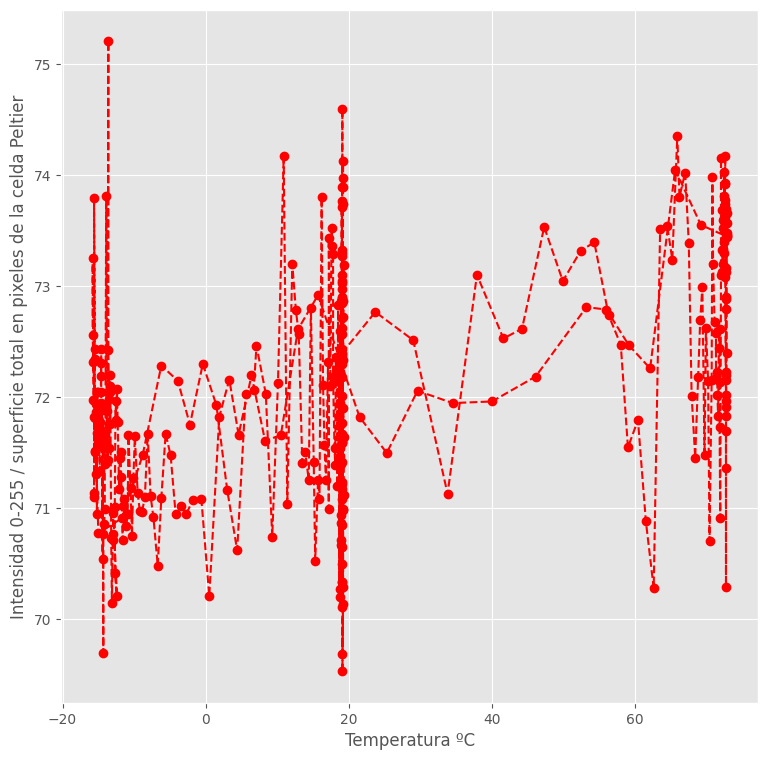

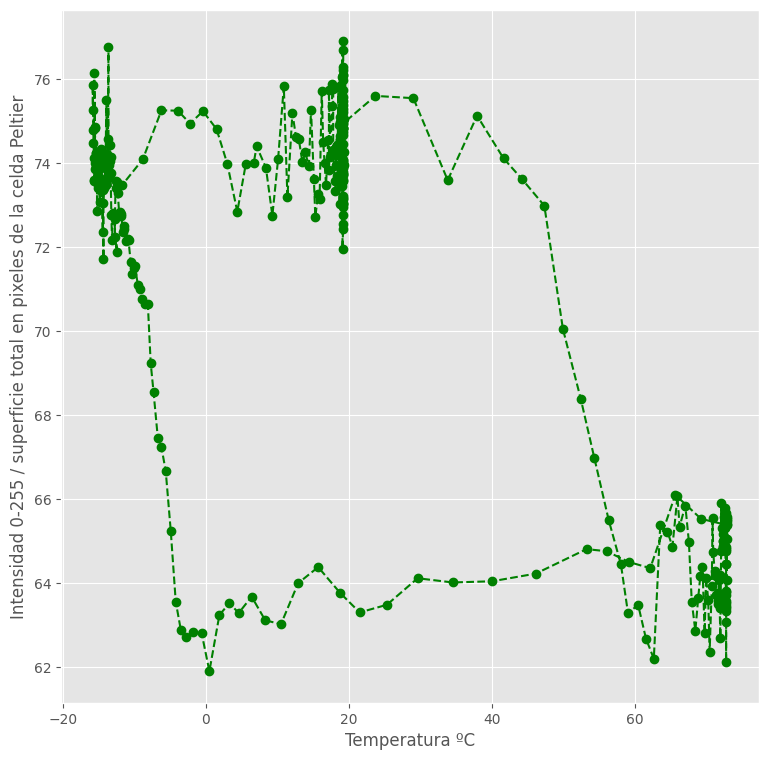

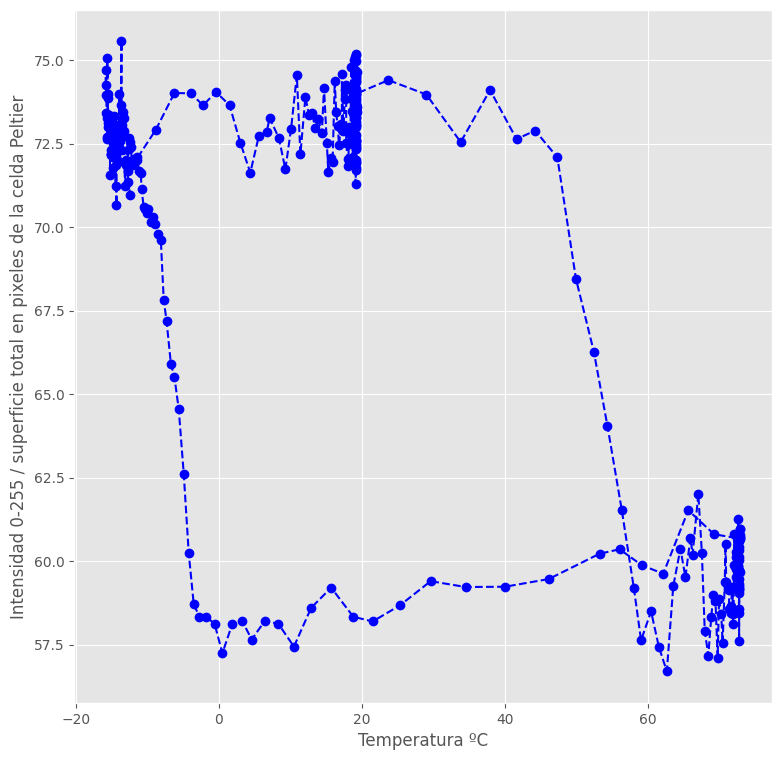

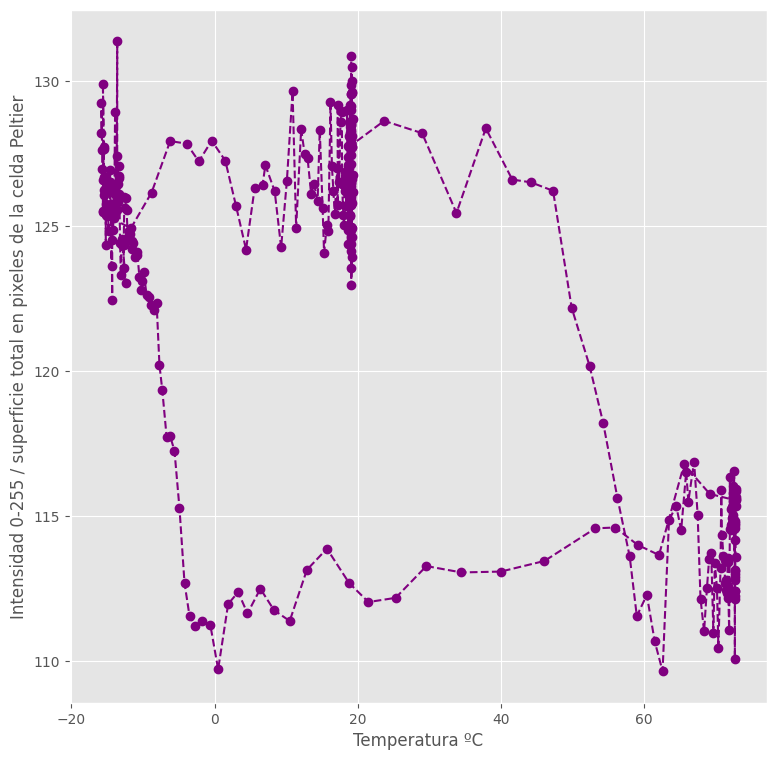

In [26]:
cut=len(df['temp'])
salto=29
for i in ['r','g','b']:
    plt.figure(figsize=(9,9))

    plt.xlabel('Temperatura ºC')
    plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')

    color=i
    dashdash='--'
    plt.plot(df['temp'],df_video4[color][::salto][:cut],color+'o'+dashdash)
    
plt.figure(figsize=(9,9))

plt.xlabel('Temperatura ºC')
plt.ylabel('Intensidad 0-255 / superficie total en pixeles de la celda Peltier')

color=''
dashdash='--'
plt.plot(df['temp'],intensidad[::salto][:cut],color+'o'+dashdash,color='purple')